<a href="https://colab.research.google.com/github/bhardwaj1230/NMT/blob/master/BT_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
%matplotlib inline
import numpy as np 
from matplotlib import rc
import matplotlib.patches as mpatches

def log_processor(location):
    
    with open(location) as f:
        data = f.readlines()

    data = [line.strip('\n') for line in data]
    acc = []
    for line in data:
        if '__log__' in line:
            s = line.find('{')
            e = line.find('}')
            acc.append(line[s+1 : e-1].split(','))
    log_data = []
    for i in acc:
        load=[]
        for j in i:
            load.append(re.sub("[^\d.]+", "", j))
        log_data.append(load)

    cols = ['epoch', 'valid_en_fr_mt_ppl', 'valid_en_fr_mt_acc', 'valid_en_fr_mt_bleu', 'test_en_fr_mt_ppl', 'test_en_fr_mt_acc', 'test_en_fr_mt_bleu']
    log_data = pd.DataFrame(log_data)
    log_data.columns = cols
    
    return log_data



rc('figure', figsize=(9, 6))
rc('axes', titlesize = 20, labelsize = 18, titleweight = 'bold')
rc('xtick', labelsize = 16, color = 'black')
rc('ytick', labelsize = 16, color = 'black')
rc('legend', fontsize = 16, handlelength = 2)

def plot_fnc(data):
    
    means = pd.Series(data).rolling(10, min_periods=10).mean()
    stds = pd.Series(data).rolling(10, min_periods=10).std()/4
    means.plot()
    plt.fill_between(range(len(means)),means - stds, means + stds, alpha=0.2)
    
    plt.xlabel('Epochs')
    plt.ylabel('BLEU Scores')


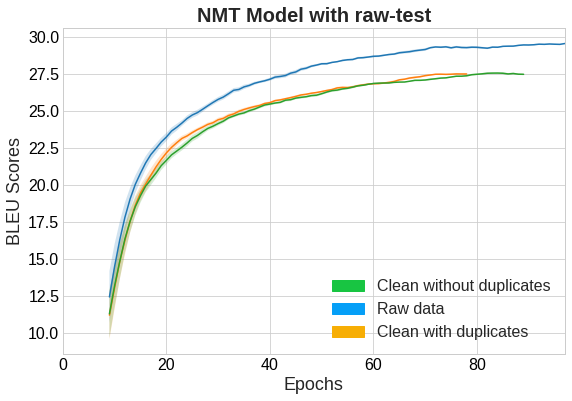

In [0]:
raw = log_processor('raw_bt_log.out')
clean = log_processor('no_noise.out')
super_clean = log_processor('no_noise_duplicate_bt_log.out')

plot_fnc(raw['valid_en_fr_mt_bleu'])
plot_fnc(clean['valid_en_fr_mt_bleu'])
plot_fnc(super_clean['valid_en_fr_mt_bleu'])

plt.title('NMT Model with raw-test')
red_patch = mpatches.Patch(color ='#059FF7', label='Raw data')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Clean with duplicates')
purple_patch = mpatches.Patch(color ='#18C542', label='Clean without duplicates')
plt.legend(handles=[purple_patch, red_patch, blue_patch])

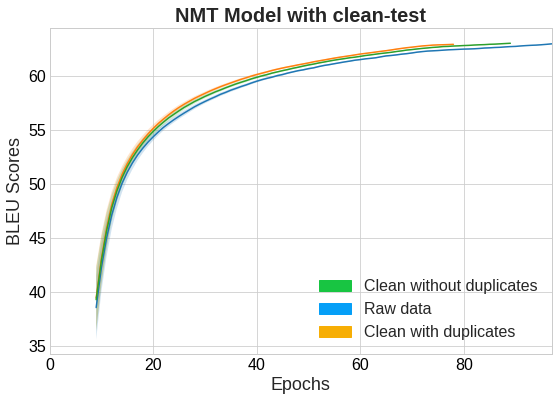

In [0]:
plot_fnc(raw['valid_en_fr_mt_acc'])
plot_fnc(clean['valid_en_fr_mt_acc'])
plot_fnc(super_clean['valid_en_fr_mt_acc'])

plt.title('NMT Model with clean-test')
red_patch = mpatches.Patch(color ='#059FF7', label='Raw data')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Clean with duplicates')
purple_patch = mpatches.Patch(color ='#18C542', label='Clean without duplicates')
plt.legend(handles=[purple_patch, red_patch, blue_patch])

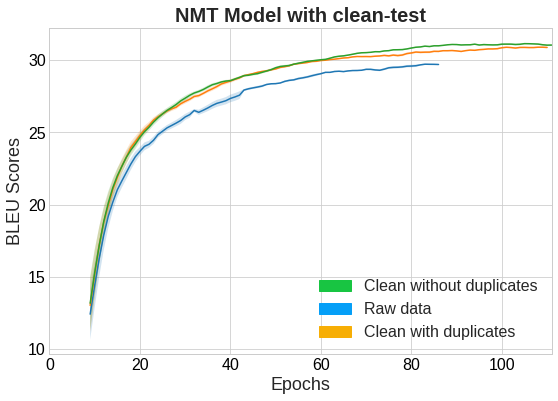

In [0]:
raw = log_processor('raw_clean_test.out')
clean = log_processor('no_noise_clean_test.out')
super_clean = log_processor('no_noise_duplicate_clean_test.out')

plot_fnc(raw['valid_en_fr_mt_bleu'])
plot_fnc(clean['valid_en_fr_mt_bleu'])
plot_fnc(super_clean['valid_en_fr_mt_bleu'])

plt.title('NMT Model with clean-test')
red_patch = mpatches.Patch(color ='#059FF7', label='Raw data')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Clean with duplicates')
purple_patch = mpatches.Patch(color ='#18C542', label='Clean without duplicates')
plt.legend(handles=[purple_patch, red_patch, blue_patch])

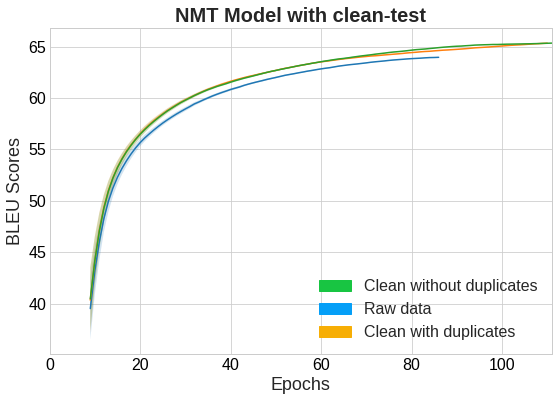

In [0]:
plot_fnc(raw['valid_en_fr_mt_acc'])
plot_fnc(clean['valid_en_fr_mt_acc'])
plot_fnc(super_clean['valid_en_fr_mt_acc'])

plt.title('NMT Model with clean-test')
red_patch = mpatches.Patch(color ='#059FF7', label='Raw data')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Clean with duplicates')
purple_patch = mpatches.Patch(color ='#18C542', label='Clean without duplicates')
plt.legend(handles=[purple_patch, red_patch, blue_patch])